請開啟任意 anaconda prompt
輸入：

conda activate finlab

conda install -c conda-forge bottleneck 

pip install pyfolio==0.9.2

然後再執行以下程式喔！

# 0050 測試

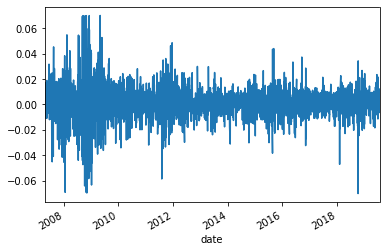

In [5]:
# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 獲取0050收盤價資料
from finlab.data import Data
data = Data()
close = data.get_adj("收盤價")

# 將收盤假日期調整，這樣子等等使用pyfolio才不會有問題
close.index = close.index.tz_localize("Asia/Taipei")

# 每天報酬率繪圖
%matplotlib inline
close['0050'].pct_change().plot()

# 使用 Pyfolio 觀察個股報酬率

/Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


Start date,2007-04-23
End date,2019-07-24
Total months,144
,Backtest
Annual return,6.8%
Cumulative returns,119.8%
Annual volatility,20.0%
Sharpe ratio,0.43
Calmar ratio,0.12
Stability,0.79
Max drawdown,-55.8%


/Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,55.75,2007-10-29,2008-11-20,2011-01-28,850
1,23.01,2011-01-28,2011-12-19,2013-05-16,600
2,20.96,2015-04-27,2015-08-24,2016-08-08,336
3,17.53,2018-08-30,2019-01-04,NaT,NaN
4,14.55,2007-07-25,2007-08-16,2007-10-02,50


/Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


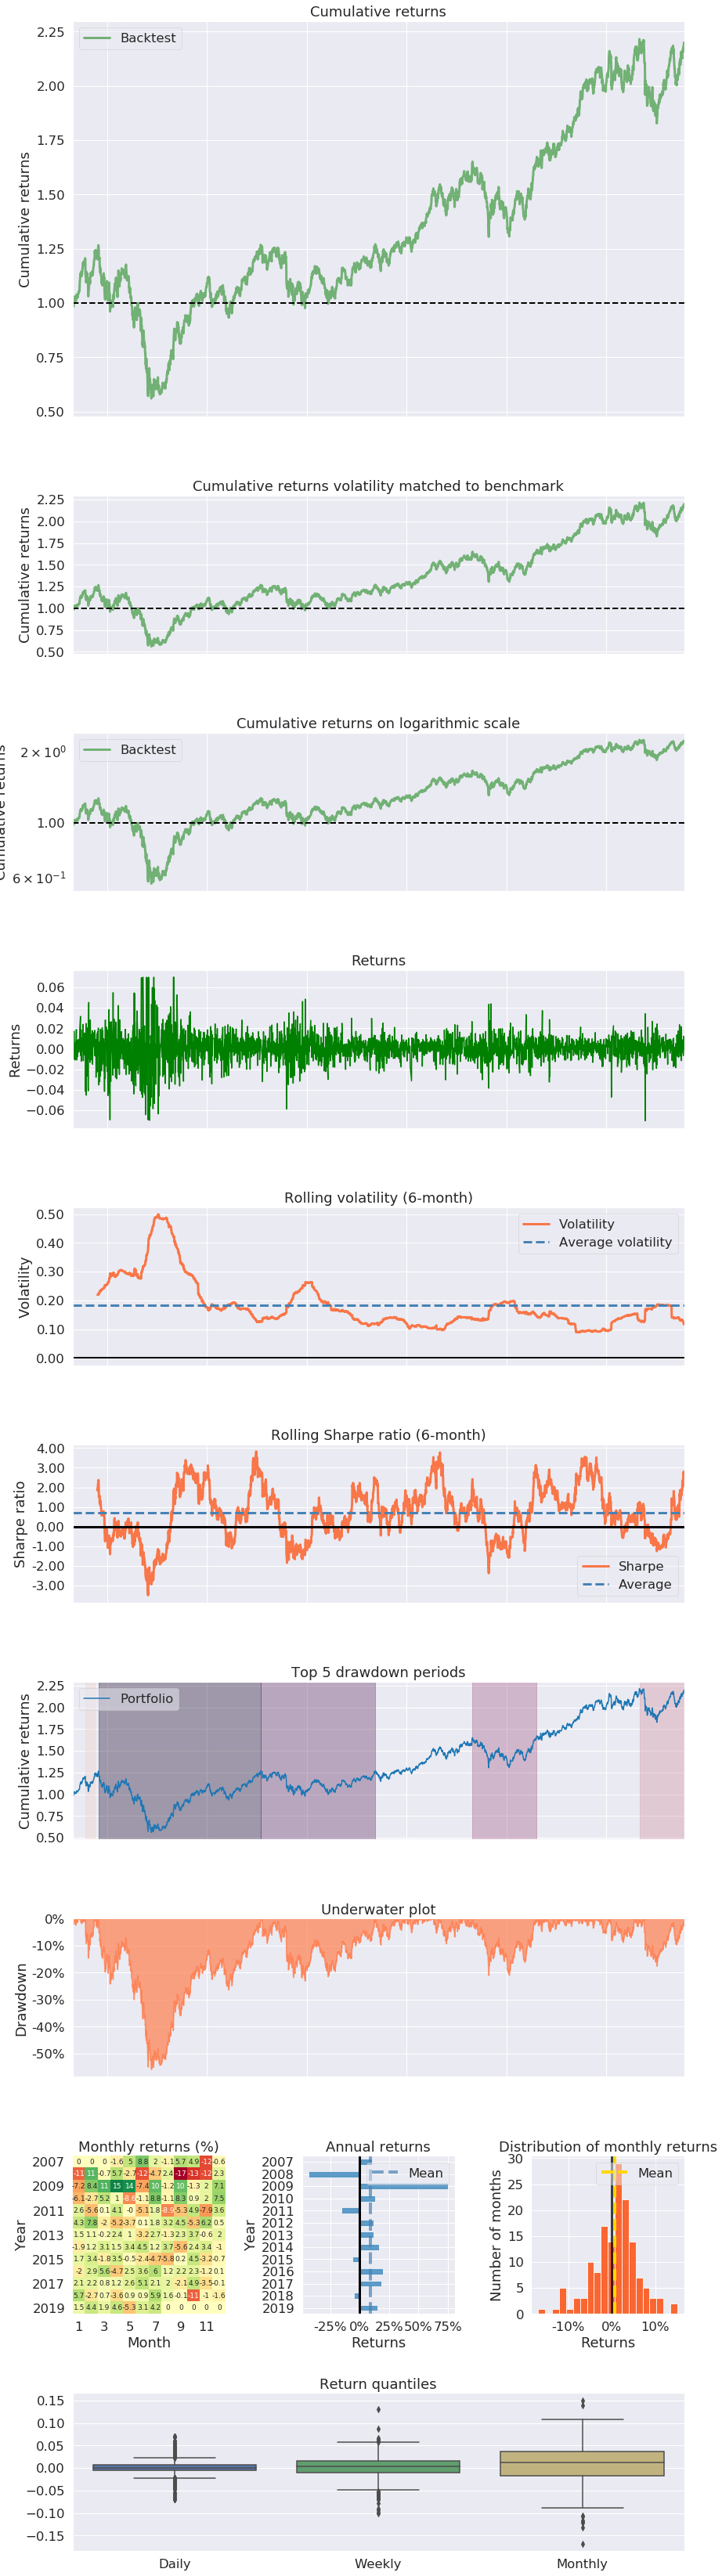

In [6]:
import pyfolio as pf

pf.create_returns_tear_sheet(close['0050'].pct_change())

Start date,2007-04-24
End date,2019-07-24
Total months,144
,Backtest
Annual return,8.3%
Cumulative returns,160.6%
Annual volatility,10.2%
Sharpe ratio,0.83
Calmar ratio,0.74
Stability,0.98
Max drawdown,-11.2%


/Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,11.18,2014-09-23,2014-10-16,2015-04-24,154
1,10.14,2012-02-29,2012-08-30,2013-07-15,359
2,8.23,2016-03-22,2016-05-13,2016-06-30,73
3,7.72,2010-01-15,2010-06-04,2010-07-08,125
4,7.52,2017-09-18,2018-02-09,2018-06-07,189


/Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


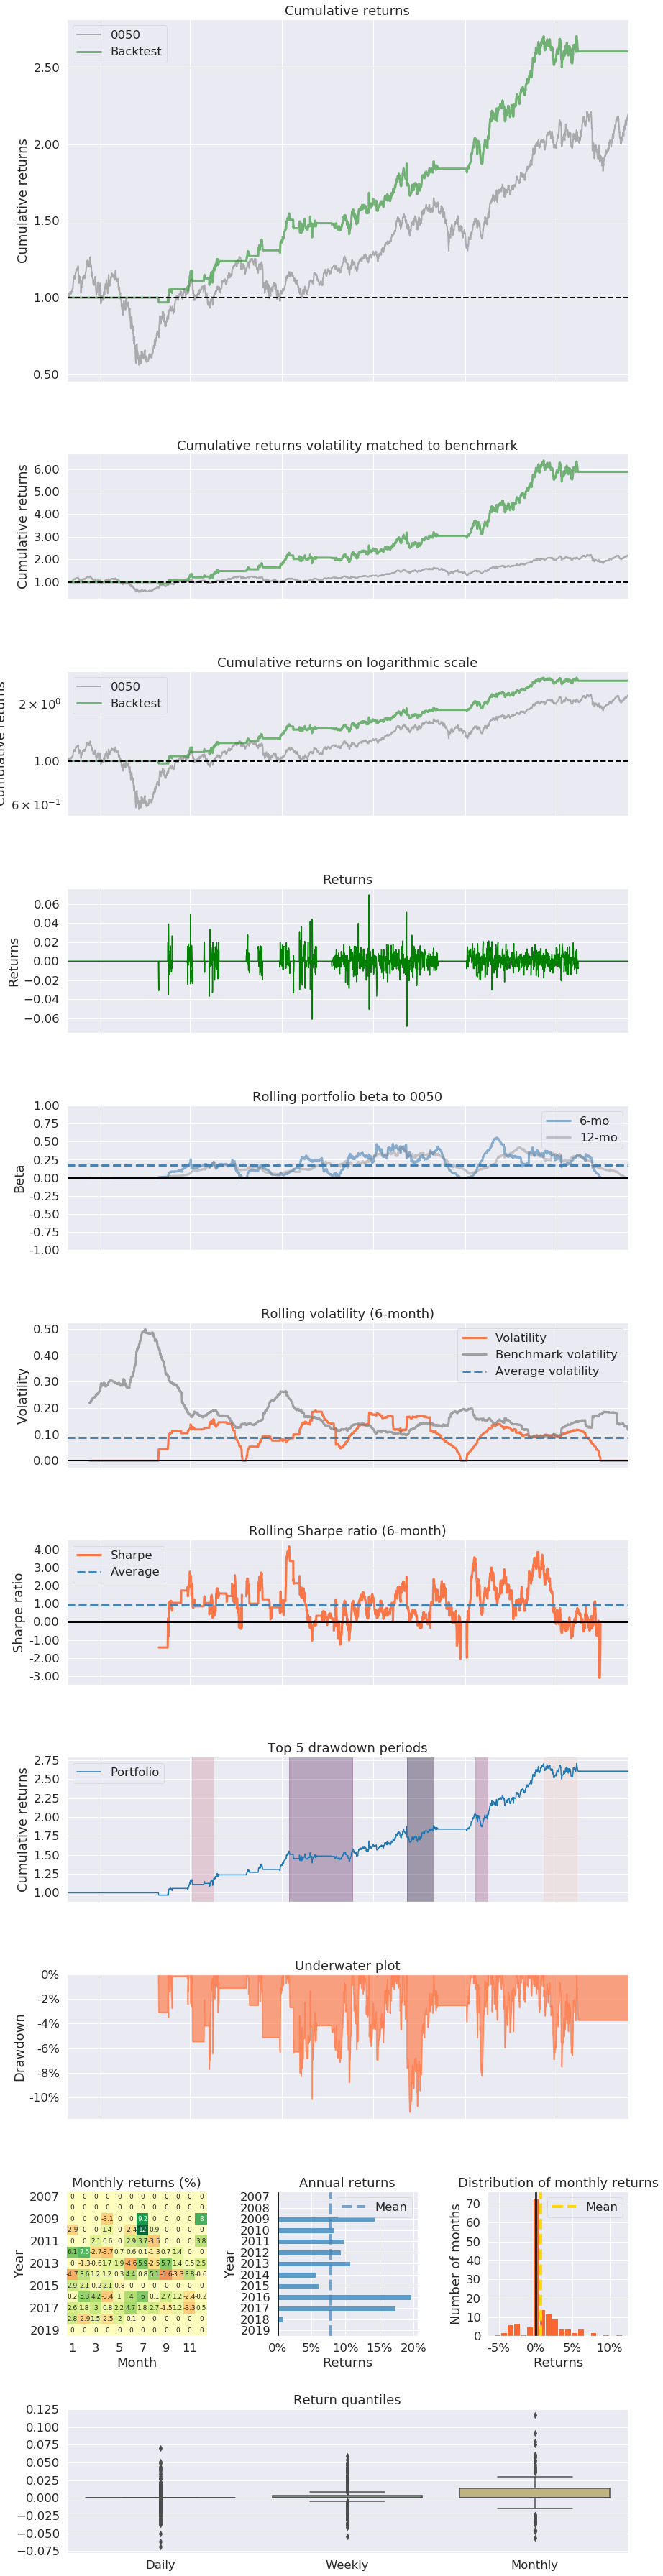

In [11]:
import pickle
import pandas as pd

# 得到 上一個單元的 回測結果
ret = pickle.load(open("return_history.pkl", "rb"))

# 將回測報酬率取出來
ret = ret.pct_change().dropna()
ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')

# 利用pyfolio 比較報酬率
pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())